# How to compute LSD profiles

In this tutorial, we demonstrate the calculation of LSD profiles using the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function, which is a wrapper around the main function of the [LSDpy](https://github.com/folsomcp/LSDpy) Package. 

The advantage of the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function is that it has been designed with default options that made it easy to use in interactive shells and within python scripts. 

:::{warning}
You can of course use the LSDpy.main() function directly -- however it has different input requirement, such as a parameter input.dat file (which is well suited for a command-line workflow). See [](../GetStarted/Quickstart_CLI.md) for details
:::

We need to import the following packages:

In [1]:
import specpolFlow as pol
import matplotlib.pyplot as plt

In this tutorial, we assume that you already have a normalized spectrum in a .s format, and a mask file that has been suitably cleaned for your needs. 

We will use these two files [hd46328_test_1.s.norm](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/Tutorials/HoToLSD_tutorialfiles/hd46328_test_1.s.norm) and [hd46328_test_depth0.02_clean.mask](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/Tutorials/HoToLSD_tutorialfiles/hd46328_test_depth0.02_clean.mask)

:::{admonition} No normalized .s file?
:class: tip, dropdown
See the following tutorials
* [](./1-ConvertToSFiles_Tutorial.ipynb)
* [](../GetStarted/NormalizingOneSpectrum.md)
* [](./2-Normalizing_Tutorial.md)
:::

:::{admonition} No mask file?
:class: tip, dropdown
See the walkthrough in [](../GetStarted/OneObservationFlow_Tutorial.ipynb),
and also the following tutorials
* [](./3-MaskClass_Tutorial.ipynb)
* [](./3b-MaskUI_Tutorial.md)
* [](./4-ExcludeMaskRegionClass_Tutorial.ipynb)
:::

In the cell below, we set some variables with the path/name of the observation file and the mask file.

In [2]:
mask_file = 'HowToLSD_tutorialfiles/hd46328_test_depth0.02_clean.mask'
obs_file  = 'HowToLSD_tutorialfiles/hd46328_test_1.s.norm'

## 1. Calculating a LSD profile "on-the-fly"

First, we demonstrate a very simple application of the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function.

:::{note}
The <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function returns 2 python objects:
* An <a href='../API/LSD_API.html#specpolFlow.LSD'>`LSD`</a> with the computed LSD profile
* A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object with the LSD model spectrum (more on this later)

In the example below, we have unpacked the returned tuple into two separate variables. 
:::

Modified line mask, removed 64 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 222 point profile with 1.810000 km/s pixels
mean mask depth 0.101386 wl 494.081 Lande 1.179956 (from 1039 lines)
mean mask norm weightI 0.506930 weightV 0.480710
saving model spectrum to  ...
I reduced chi2 193.8252 (chi2 19858356.38 constraints 102677 dof 222)
 Rescaling error bars by: 13.922110
V reduced chi2 1.1163 (chi2 114372.85 constraints 102677 dof 222)
 Rescaling error bars by: 1.056562
 removing profile continuum pol: -5.3633e-06 +/- 1.2232e-08 (avg err 1.1045e-04)
N1 reduced chi2 1.1078 (chi2 113495.43 constraints 102677 dof 222)
 Rescaling error bars by: 1.052501
 removing profile continuum pol: -6.5530e-06 +/- 1.2138e-08 (avg err 1.1003e-04)
line range estimate -20.809999999999775 49.780000000000314 km/s
V in line reduced chi^2 51.897682 (chi2 2024.009582) 
 detect prob 1.000000 (fap 0.000000e+00)
 Detection! V (fap 0.000000e+00)
 V outside line reduced chi

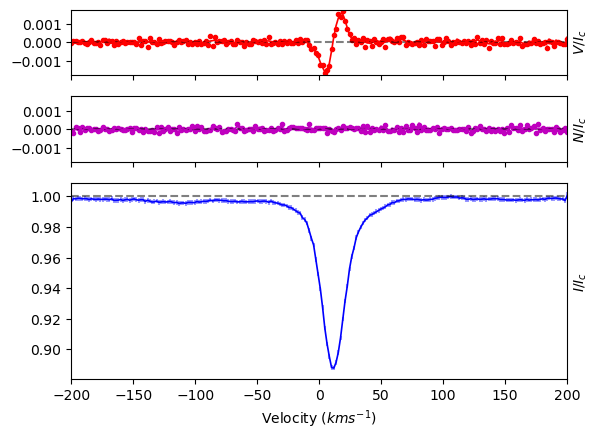

In [3]:
lsd, mod = pol.run_lsdpy(obs=obs_file, mask=mask_file)

The <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function outputs some information about the calculation. For example, it provides 
* the average line parameters (simple average, not SNR-weighted average),
* the scaling that was used for the error bars based on the quality of the LSD model spectrum (see the next section),
* an initial computation of the False Alarm Probability (FAP) and of the longitudinal magnetic field.
    :::{warning}
    This automated calculation might work all right for well-behaved line profiles, but we strongly recommend that you perform a more thorough computation. See:
    - [](../GetStarted/OneObservationFlow_Tutorial.ipynb)
    - [](./6-CalculateBz_Tutorial.ipynb)
    :::

There is also a plot genenerated. If you would like to turn off the plot, simply set `plotLSD=False`

### 1.1 Setting the velocity limits/grid and the LSD weigths

In this section, we discuss some often-used options to the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function. 

The velocity grid that is used to compute the LSD profile is controlled by the `velStart`, `velEnd`, and the `velPixel` keywords. 

In the example above, there is a lot of continuum on each side of the profile, and we could restrict the range of velocity to, say, -100 to 100 km/s. 

The default velocity step in <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> is 1.8 km/s. Because the spectral line is a bit broad, we could increase this a bit to, say, 2.6 km/s and still have at least 20 datapoints inside of the spectral line. 


In [4]:
lsd, mod = pol.run_lsdpy(obs=obs_file, mask=mask_file, velStart=-100, velEnd=100,
                         plotLSD=False)

Modified line mask, removed 64 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 112 point profile with 1.810000 km/s pixels
mean mask depth 0.101386 wl 494.081 Lande 1.179956 (from 1039 lines)
mean mask norm weightI 0.506930 weightV 0.480710
saving model spectrum to  ...
I reduced chi2 219.8817 (chi2 16981020.09 constraints 77340 dof 112)
 Rescaling error bars by: 14.828407
V reduced chi2 1.1245 (chi2 86839.21 constraints 77340 dof 112)
 Rescaling error bars by: 1.060402
 removing profile continuum pol: -4.4113e-06 +/- 1.2123e-08 (avg err 1.0985e-04)
N1 reduced chi2 1.1034 (chi2 85210.41 constraints 77340 dof 112)
 Rescaling error bars by: 1.050410
 removing profile continuum pol: -3.1457e-06 +/- 1.1895e-08 (avg err 1.0882e-04)
line range estimate -18.549999999999898 48.420000000000186 km/s
V in line reduced chi^2 53.859498 (chi2 1992.801423) 
 detect prob 1.000000 (fap 0.000000e+00)
 Detection! V (fap 0.000000e+00)
 V outside line reduced chi^2 1.

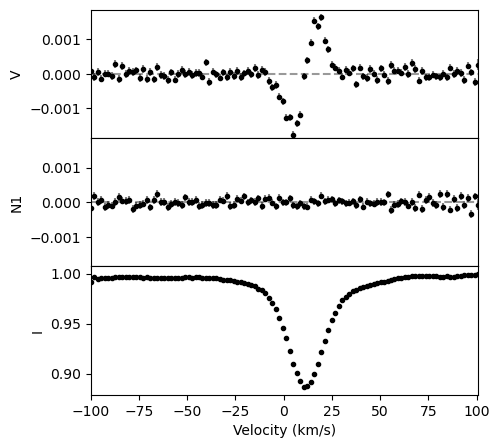

In [5]:
fig = lsd.plot(figsize=(5,5))

Another often neglected parameter that is essential to the LSD computation is the normalization weights. 

The intensity (Stokes I) line weight is proportional to the line depth ($d$). The polarization weight (Stokes V) is proportional to $dg\lambda$, where $g$ is the Landé factor and $\lambda$ is the wavelength of the line. 

It is the usual practice to normalize these weights to a set value. This means that the resulting LSD profile will represent a spectral line with these weights. 

Some example normalization values are: $d=0.2$, $g=1.2$, and $\lambda=500$ nm (the default values). 

:::{important}
The `normWave` value needs to be given in nanometers
:::

In the example below, we change the normalization depth to 0.1. 

In [6]:
lsd, mod = pol.run_lsdpy(obs=obs_file, mask=mask_file, velStart=-100, velEnd=100,
                         normDepth=0.1, normLande=1.0, normWave=400,
                         plotLSD=False)

Modified line mask, removed 64 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 112 point profile with 1.810000 km/s pixels
mean mask depth 0.101386 wl 494.081 Lande 1.179956 (from 1039 lines)
mean mask norm weightI 1.013859 weightV 1.442130
saving model spectrum to  ...
I reduced chi2 219.8817 (chi2 16981020.09 constraints 77340 dof 112)
 Rescaling error bars by: 14.828407
V reduced chi2 1.1245 (chi2 86839.21 constraints 77340 dof 112)
 Rescaling error bars by: 1.060402
 removing profile continuum pol: -1.4704e-06 +/- 1.3470e-09 (avg err 3.6617e-05)
N1 reduced chi2 1.1034 (chi2 85210.41 constraints 77340 dof 112)
 Rescaling error bars by: 1.050410
 removing profile continuum pol: -1.0486e-06 +/- 1.3217e-09 (avg err 3.6272e-05)
line range estimate -18.549999999999898 48.420000000000186 km/s
V in line reduced chi^2 53.859498 (chi2 1992.801423) 
 detect prob 1.000000 (fap 0.000000e+00)
 Detection! V (fap 0.000000e+00)
 V outside line reduced chi^2 1.

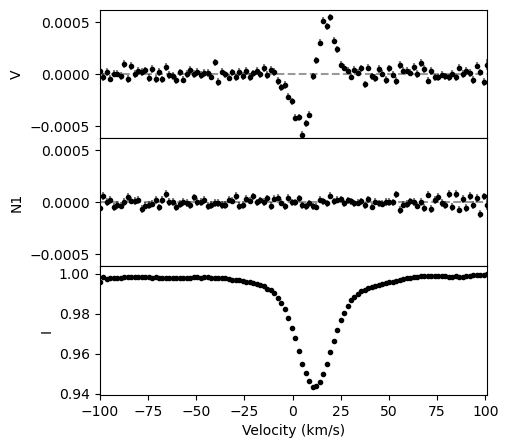

In [7]:
fig = lsd.plot(figsize=(5,5))

Because these are such important parameters, they are included in the LSD object header. They will also be included in the header of the file when the LSD object is saved. 

In [8]:
print(lsd.header)

# normalizing: d=0.100 lande=1.000 wl= 400.0 (I norm weight 0.100, V norm weight  40.000)



### 1.2 More advanced options

The LSDpy code and the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function have a set of more advanced options. For example:

* The default behaviour is to remove lines that are too closely spaced. This option can be turned off by setting the keyword `trimMask`to `False`. 

* The default behaviour is to remove continnum polarization for Stokes V. This option can be turned off by setting the keyword `removeContPol `to `False`. 

* It is possible to perform a sigma clipping of the observed spectrum from a comparison between the observed spectrum and the LSD model spectrum. This option is turned off by default, but can be controlled by the `sigmaClipIter` and the `sigmaClip` keywords. 

See the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> API for more information. 

## 2. Having a look at the model spectrum

The function also returns a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object that contains the LSD model (that is, the LSD profile convolved with the line mask -- or to be more precise, it is the LSD profile vector multiplied by the mask matrix). 

In the cell below, we overplot this model (purple) on the observed spectrum (grey). 

::::{margin}
:::{Note}
The <a href='../API/Mask_API.html#specpolFlow.cleanMaskUI'>`cleanMaskUI`</a> tool plots and use this model spectrum to assist in tweaking the line mask to better match the observed line depths. 
See [](3b-MaskUI_Tutorial.md).
:::
::::

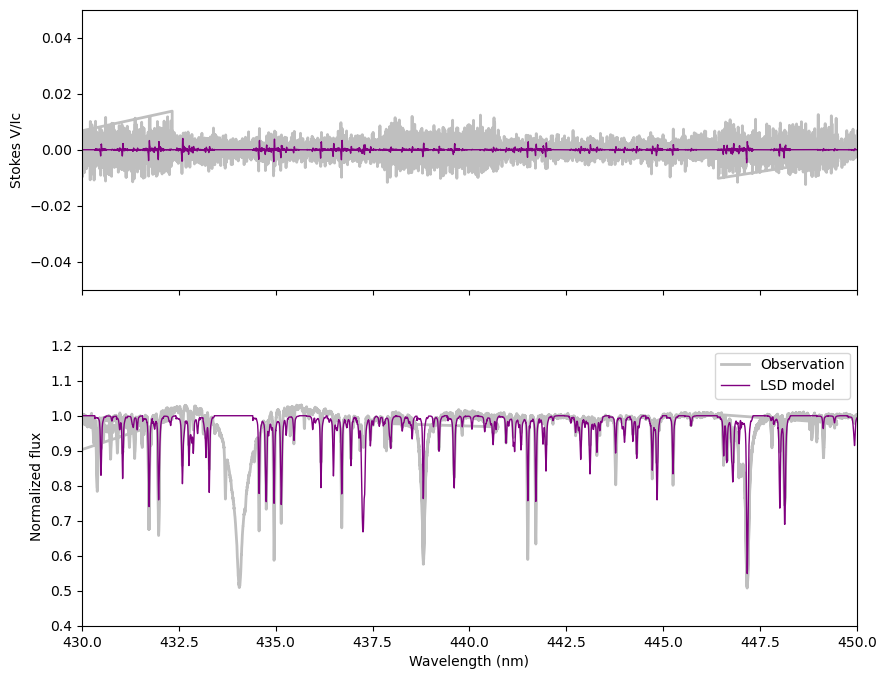

In [9]:
spec = pol.read_spectrum(obs_file)

fig, ax = plt.subplots(2,1, figsize=(10,8), sharex=True)
ax[1].plot(spec.wl, spec.specI, lw=2, c='0.75', label='Observation')
ax[1].set_xlim(430,450)
ax[1].set_ylim(0.4,1.2)
ax[1].set_xlabel('Wavelength (nm)')
ax[1].set_ylabel('Normalized flux')
ax[1].plot(mod.wl, mod.specI, c='purple', lw=1, label='LSD model')

ax[0].plot(spec.wl, spec.specV, lw=2, c='0.75')
ax[0].plot(mod.wl, mod.specV, c='purple', lw=1)
ax[0].set_ylim(-0.05,0.05)
ax[0].set_ylabel('Stokes V/Ic')

ax[1].legend(loc=0)

In the text output from LSDpy:

In [10]:
lsd, mod = pol.run_lsdpy(obs=obs_file, mask=mask_file, velStart=-100, velEnd=100,
                         normDepth=0.1, normLande=1.0, normWave=400,
                         plotLSD=False)

Modified line mask, removed 64 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 112 point profile with 1.810000 km/s pixels
mean mask depth 0.101386 wl 494.081 Lande 1.179956 (from 1039 lines)
mean mask norm weightI 1.013859 weightV 1.442130
saving model spectrum to  ...
I reduced chi2 219.8817 (chi2 16981020.09 constraints 77340 dof 112)
 Rescaling error bars by: 14.828407
V reduced chi2 1.1245 (chi2 86839.21 constraints 77340 dof 112)
 Rescaling error bars by: 1.060402
 removing profile continuum pol: -1.4704e-06 +/- 1.3470e-09 (avg err 3.6617e-05)
N1 reduced chi2 1.1034 (chi2 85210.41 constraints 77340 dof 112)
 Rescaling error bars by: 1.050410
 removing profile continuum pol: -1.0486e-06 +/- 1.3217e-09 (avg err 3.6272e-05)
line range estimate -18.549999999999898 48.420000000000186 km/s
V in line reduced chi^2 53.859498 (chi2 1992.801423) 
 detect prob 1.000000 (fap 0.000000e+00)
 Detection! V (fap 0.000000e+00)
 V outside line reduced chi^2 1.

you will notice some information about the reduced $\chi^2$ between the model spectrum and the observed spectrum. 

The error bars in Stokes I and V are scaled by multiplying the formal error bar by the square root of the reduced $\chi^2$. 

## 3. Using the keywords for batch calculation/saving

In all of the examples above, we were interested in looking at the LSD profiles produced. We did not save the resulting LSD profiles nor the LSD model spectra as files. 

:::{tip}
This can be done at anytime with the associated class functions <a href='../API/LSD_API.html#specpolFlow.LSD.save'>`LSD.save`</a> and <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`Spectrum.save`</a> functions (which is useful when manipulating LSD profiles in your workflow)
:::

But often, we will be interested in saving the LSD profile and LSD model spectrum as files straight away, and the <a href='../API/LSD_API.html#specpolFlow.run_lsdpy'>`run_lsdpy`</a> function has some courtesy keywords to do just so during its call. 

In [12]:
lsd, mod = pol.run_lsdpy(obs=obs_file, mask=mask_file, velStart=-100, velEnd=100,plotLSD=False,
                         outLSDName='Output/lsd.s',
                         outModelName='Output/model.s')

Modified line mask, removed 64 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 112 point profile with 1.810000 km/s pixels
mean mask depth 0.101386 wl 494.081 Lande 1.179956 (from 1039 lines)
mean mask norm weightI 0.506930 weightV 0.480710
saving model spectrum to Output/model.s ...
I reduced chi2 219.8817 (chi2 16981020.09 constraints 77340 dof 112)
 Rescaling error bars by: 14.828407
V reduced chi2 1.1245 (chi2 86839.21 constraints 77340 dof 112)
 Rescaling error bars by: 1.060402
 removing profile continuum pol: -4.4113e-06 +/- 1.2123e-08 (avg err 1.0985e-04)
N1 reduced chi2 1.1034 (chi2 85210.41 constraints 77340 dof 112)
 Rescaling error bars by: 1.050410
 removing profile continuum pol: -3.1457e-06 +/- 1.1895e-08 (avg err 1.0882e-04)
line range estimate -18.549999999999898 48.420000000000186 km/s
V in line reduced chi^2 53.859498 (chi2 1992.801423) 
 detect prob 1.000000 (fap 0.000000e+00)
 Detection! V (fap 0.000000e+00)
 V outside line re